# Projectile Motion Assignment: Due 9/23

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

* $m v_{x}' = 0$

* $m v_{y}' = - mg$

* $x' = v_x$

* $y' = v_y$

Code the equations into a function 

In [1]:
import numpy as np
from math import sin,cos,radians,pi
import scipy as sc
from scipy import integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

#define projectile motion function in vaccum
def proj(t: float, val: np.array, m: float, c = lambda y: 0):
    '''t is time
    val is an array containing [x position, x component of velocity, y position, y component of velocity]
    m is the mass of the projectile (Float)
    c is the air resistance function. Defaults to c(y) = 0
    Returns velocity and acceleration in both the x and y directions'''
    if m == 0:
        raise ValueError('Mass (m) cannot equal 0.')
    if not callable(c):
        raise ValueError('c must be a callable function even if constant')
    r = -c(val[1]) * np.sqrt(val[1]**2 + val[3]**2)
    return np.array([val[1], (r*val[1]) / m, val[3], -9.80 + ((r*val[3]) / m)])

def proj_call(m, c):
    return lambda t,y: proj(t,y,m,c)

#Initial conditions
conditions = np.array([0, 300*cos(radians(50)), 0, 300*sin(radians(50))])

D = 15 #cm
m = ( 7.8 * ((4/3) * pi * (D/2)**3) ) / 1000 #kg
D /= 100 #Convert to m

c0 = lambda y: 0

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [2]:
t0, tf = 0, 3.5 #s
t = np.linspace(t0,tf,50)
sol_RK45 = integrate.solve_ivp(proj_call(m,c0),(t0,tf),conditions,method='RK45', t_eval=t)

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

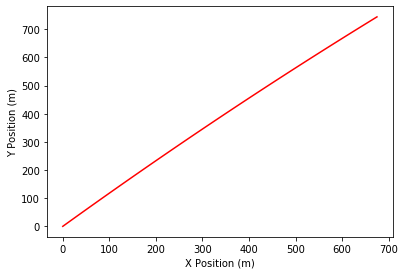

In [3]:
SCnoresistance = plt.figure('Scipy RK4 Method No Air Resistance')
SCaxes = SCnoresistance.add_axes([0.15,0.1,0.8,0.8])
SCaxes.set_xlabel('X Position (m)')
SCaxes.set_ylabel('Y Position (m)')
SCaxes.set_title('')
SCaxes.errorbar(sol_RK45.y[0],sol_RK45.y[2],fmt='r-')
plt.show()

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

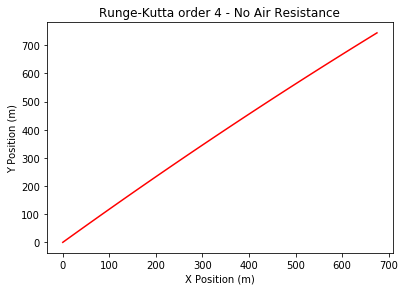

In [4]:
def rungekutta_4(f,t: np.array,x0: np.array,args=()):
    '''Runge Kutta 4th Order Approximation
    f is a function
    t is an array full of the scalar independent variables to be evaluated
    x0 is an array full of the initial conditions of the data
    args are extra arguments to pass into f if necessary'''
    if not callable(f):
        raise ValueError('f must be a callable function')
    n = len(t)
    x = np.zeros((n,len(x0)))
    x[0] = x0 #set inital conditions
    for i in range (0,n-1):
        dt = t[i+1]-t[i]
        k1 = f(t[i], x[i], *args)
        k2 = f(t[i] + dt/2.0, x[i] + dt/2.0 * k1, *args)
        k3 = f(t[i] + dt/2.0, x[i] + dt/2.0 * k2, *args)
        k4 = f(t[i] + dt, x[i] + dt * k3, *args)
        x[i+1] = x[i] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return np.transpose(x)

sol_RK = rungekutta_4(proj, t, conditions, args=(m,c0))

RKnoresistance = plt.figure('Runge-Kutta order 4 - No Air Resistance')
RKaxes = RKnoresistance.add_axes([0.15,0.1,0.8,0.8])
RKaxes.set_xlabel('X Position (m)')
RKaxes.set_ylabel('Y Position (m)')
RKaxes.set_title('Runge-Kutta order 4 - No Air Resistance')
RKaxes.errorbar(sol_RK[0],sol_RK[2],fmt='r-')
plt.show()

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

Code the equations into a function

In [5]:
#The function from part a allows for air resistance functions but defaults to none so I don't write a new one here
cC = lambda y : 0.25 * D**2 #c at a constant value

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [6]:
sol_RK45constant = integrate.solve_ivp(proj_call(m,cC),(t0,tf),conditions,method='RK45', t_eval=t)

Plot the ball's trajecory and find it's horizontal range

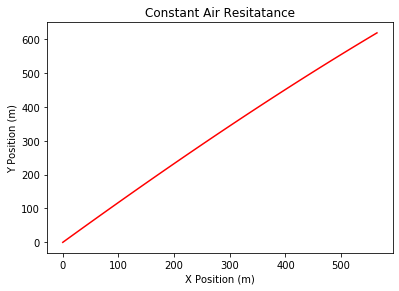

In [7]:
SCconstant = plt.figure('Scipy RK4 Method Constant Air Resistance')
Constantaxes = SCconstant.add_axes([0.15,0.1,0.8,0.8])
Constantaxes.set_xlabel('X Position (m)')
Constantaxes.set_ylabel('Y Position (m)')
Constantaxes.set_title('Constant Air Resitatance')
Constantaxes.errorbar(sol_RK45constant.y[0],sol_RK45constant.y[2],fmt='r-')
plt.show()

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

Code the equations into a function

In [8]:
#The function from part a allows for air resistance functions but defaults to none so I don't write a new one here
cy = lambda y : 0.25 * D**2 * np.exp(-y/10000)

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [9]:
sol_RK45vary = integrate.solve_ivp(proj_call(m,cy),(t0,tf),conditions,method='RK45', t_eval=t)

Plot the ball's trajectory and find it's horizontal range

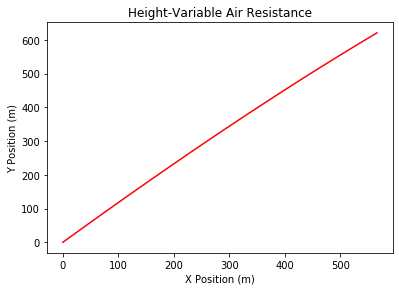

In [10]:
SCvary = plt.figure('Scipy RK4 Method Height-Variable Air Resistance')
Varyaxes = SCvary.add_axes([0.15,0.1,0.8,0.8])
Varyaxes.set_xlabel('X Position (m)')
Varyaxes.set_ylabel('Y Position (m)')
Varyaxes.set_title('Height-Variable Air Resistance')
Varyaxes.errorbar(sol_RK45vary.y[0],sol_RK45vary.y[2],fmt='r-')
plt.show()

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

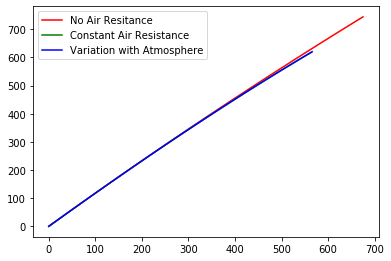

In [11]:
figureE = plt.figure()
axes = figureE.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(sol_RK45.y[0],sol_RK45.y[2],fmt='r-',label='No Air Resitance')
axes.errorbar(sol_RK45constant.y[0],sol_RK45constant.y[2],fmt='g-',label = 'Constant Air Resistance')
axes.errorbar(sol_RK45vary.y[0],sol_RK45vary.y[2],fmt='b-',label = 'Variation with Atmosphere')
axes.legend()

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)?